# c_beta Analysis

In [8]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import linregress
import MolecularClocks.src.methylation_util as m_util
from MolecularClocks.src.invasiveCpGs_consts import getConsts

consts = getConsts()

sns.set(rc={"savefig.bbox":'tight'}, font_scale=1.2, style='white')

In [9]:
figure_outdir = 'figures'
if not os.path.exists(figure_outdir):
    os.mkdir(figure_outdir)

In [10]:
TCGA_clinical_dir = os.path.join(consts['official_indir'], 'TCGA')
TCGA_c_beta_dir = os.path.join(consts['repo_dir'], 'Select_fCpGs', 'outputs')
Ringner_clinical_dir = os.path.join(consts['official_indir'], 'Ringner')
Ringner_c_beta_dir = os.path.join(consts['repo_dir'], 'Process_Other_Data_Sources', 'outputs', 'cohort_T2')

In [11]:
clinical = {}

In [12]:
clinical['TCGA'] = pd.read_table(os.path.join(TCGA_clinical_dir, 'cohort1.clinical.tsv'), index_col=0)
clinical['TCGA'] = clinical['TCGA'].set_index('bcr_patient_barcode')
c_beta_tcga = pd.read_table(os.path.join(TCGA_c_beta_dir, 'cohort.T1.c_beta.txt'), index_col=0, header=None).squeeze("columns")
c_beta_tcga.index = c_beta_tcga.index.to_series().apply(consts['sampleIDtoPatientID'])
clinical['TCGA']['c_beta'] = c_beta_tcga
clinical['TCGA'].name = 'Cohort T1'

In [13]:
clinical['ringner'] = pd.read_table(os.path.join(Ringner_clinical_dir, 'cohort.T2.clinical.txt'), index_col=0)
clinical['ringner']['c_beta'] = pd.read_table(os.path.join(Ringner_c_beta_dir, 'cohort.T2.c_beta.txt'), index_col=0).squeeze("columns")
clinical['ringner'].name = 'Cohort T2'

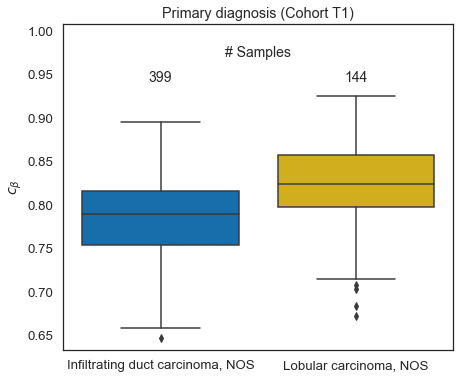

In [14]:
major_diagnoses = ['Infiltrating duct carcinoma, NOS', 'Lobular carcinoma, NOS']
m_util.saveBoxPlot(clinical['TCGA'], 'primary_diagnosis', restrict=False,
                   var_y='c_beta',
                   x_size=7, y_size=6,
                   outdir=figure_outdir, title=True, use_groups=major_diagnoses,
                   palette=consts['palette_jco'])

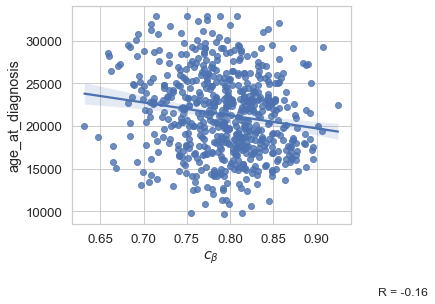

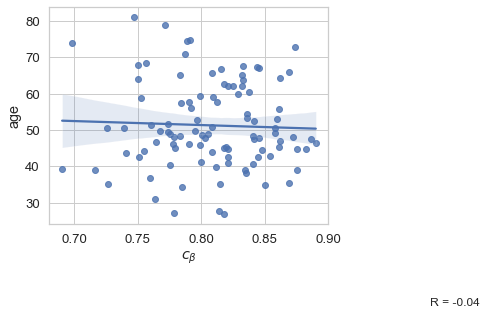

In [8]:
m_util.saveCorrelationPlot(clinical['TCGA'], var_y='age_at_diagnosis', only_pure=False, only_ductal=False, outfile=False,
#                         outdir=image_outdir,
                           x_size=5, y_size=4,
#                            dataset='Cohort T1'
                          )
m_util.saveCorrelationPlot(clinical['ringner'], var_y='age', only_pure=False, only_ductal=False, outfile=False,
#                         outdir=image_outdir,
                           x_size=5, y_size=4,
#                            dataset='Cohort T1'
                          )